In [1]:
import torch
torch.set_default_tensor_type(torch.cuda.DoubleTensor)
device=torch.device('cuda:0')
torch.cuda.set_device(device)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

# use bigger pyplot font sizes
plt.rcParams.update({'font.size': 12})

from transfer_matrix import get_scaling_dimensions_from_spectrum

/home/wenhan/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


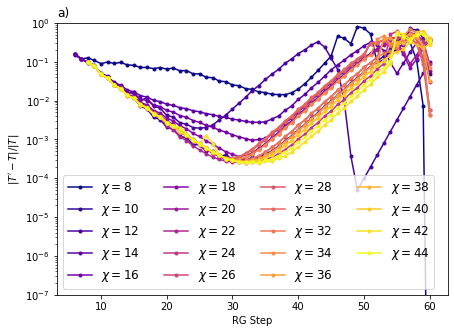

In [2]:
# diff_curve,effective_rank_curve,scaling_dimensions_curve

chis=list(range(8,46,2))
curves=[]
for chi in chis:
    curves.append(torch.load('data/hotrg_gilt_chis/X'+str(chi)+'/plots_curves.pth'))

cmap=plt.get_cmap('plasma')
plt.rcParams.update({'font.size': 14,'legend.fontsize': 12})
plt.figure(figsize=(7,5))
for iChi,(chi,curve) in enumerate(zip(chis,curves)):
    plt.plot(curve[0]['layer'],curve[0]['diff'],'.-',label='$\chi='+str(chi)+'$',color=cmap(iChi/(len(chis)-1)))
plt.yscale('log')
plt.ylim(1e-7,1)
plt.xlabel('RG Step')
plt.ylabel(r"$|T'-T|/|T|$")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,ncol=2)
plt.legend(ncol=4)
plt.title('a)',loc='left')
plt.savefig('./figures/TdiffChi.png',dpi=300,bbox_inches='tight')
plt.show()



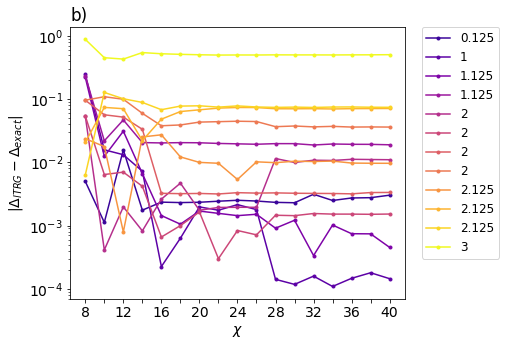

In [4]:
chis=list(range(8,42,2))

ref_scdim=[0]+[.125]+[1]+[1.125]*2+[2]*4+[2.125]*3+[3]*5+[3.125]*6+[4]*9+[4.125]*9+[5]*13+[5.125]*14
scdimss=[]
for chi in chis:
    # path='data/X'+str(chi)+'/hotrg_gilt_X'+str(chi)+'_lTRG_gilt_L30_scdims.txt'
    path='data/hotrg_gilt_chis/X'+str(chi)+'/lTRG_gilt_L30_scdims.txt'
    txt=open(path,'r').read().replace('[','').replace(']','')
    scdimss.append(np.fromstring(txt,sep=' '))
scdimss=np.stack(scdimss)
cmap=plt.get_cmap('plasma')
n=13
plt.rcParams.update({'font.size': 14,'legend.fontsize': 12})
plt.figure(figsize=(6,5))
for iOp in range(1,n):
    plt.plot(chis,np.abs(scdimss[:,iOp]-ref_scdim[iOp]),'.-',color=cmap(iOp/(n-1)),label=str(ref_scdim[iOp]))
plt.yscale('log')
plt.xlabel(r'$\chi$')
plt.ylabel(r'$|\Delta_{lTRG}-\Delta_{exact}|$')
# plt.xticks(chis)
#xticks=chis.copy()
# skip every one tick
xticks=chis.copy()
for i in range(1,len(xticks),2):
    xticks[i]=''
plt.xticks(chis,xticks)



plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('b)',loc='left')
plt.savefig('./figures/scdims_Chi.png',dpi=300,bbox_inches='tight')
plt.show()


[2.2691997288217682, 2.2692033494061925, 2.2691942979667954, 2.2691977173909694, 2.269207070574445, 2.269201539112536, 2.2692008351102277, 2.2692000305366955, 2.269200633966791, 2.2692003322517036, 2.2692001311083563, 2.2691999299650445, 2.2692000305366955, 2.2691999299650445, 2.2692000305366955, 2.2692000305366955, 2.2692000305366955, 2.2692000305366955, 2.2692000305366955]
2.269185314213022
[0.44068399414062503, 0.440683291015625, 0.440685048828125, 0.44068438476562505, 0.44068256835937497, 0.440683642578125, 0.44068377929687497, 0.440683935546875, 0.440683818359375, 0.44068387695312494, 0.44068391601562495, 0.44068395507812497, 0.440683935546875, 0.44068395507812497, 0.440683935546875, 0.440683935546875, 0.440683935546875, 0.440683935546875, 0.440683935546875]
0.44068679350977147


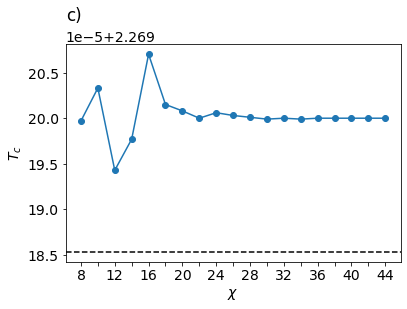

In [6]:
chis=list(range(8,46,2))
Tcs=[]
for chi in chis:
    path='data/hotrg_gilt_chis/X'+str(chi)+'/Tc.pth'
    Tc=1/torch.load(path)['beta']
    Tcs.append(Tc)

exact_Tc=2/np.log(1+np.sqrt(2))

print(Tcs)
print(exact_Tc)

print(list(1/np.array(Tcs)))
print(1/exact_Tc)

plt.rcParams.update({'font.size': 14,'legend.fontsize': 12})
plt.figure(figsize=(6,4))
plt.plot(chis,Tcs,'o-')
plt.axhline(exact_Tc,color='k',linestyle='--')
plt.xlabel(r'$\chi$')
plt.ylabel(r'$T_c$')
xticks=chis.copy()
for i in range(1,len(xticks),2):
    xticks[i]=''
plt.xticks(chis,xticks)
plt.title('c)',loc='left',y=1.08)
plt.savefig('./figures/TcChi.png',dpi=300,bbox_inches='tight')
plt.show()

# 0.44683-0.44685

In [ ]:
assert False